# Load data

In [1]:
import yfinance as yf
df = yf.Ticker("006208.TW").history(period = "10y")
df #檢查用

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2014-04-08 00:00:00+08:00,25.011373,25.033121,25.011373,25.033121,10000,0.0,0.0,0.0
2014-04-09 00:00:00+08:00,25.156364,25.156364,25.156364,25.156364,1000,0.0,0.0,0.0
2014-04-10 00:00:00+08:00,25.265109,25.265109,25.149115,25.149115,58000,0.0,0.0,0.0
2014-04-11 00:00:00+08:00,25.011373,25.120119,25.011373,25.120119,6000,0.0,0.0,0.0
2014-04-14 00:00:00+08:00,25.127368,25.134617,25.083869,25.134617,8000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2024-03-29 00:00:00+08:00,91.800003,92.349998,91.800003,92.150002,1933000,0.0,0.0,0.0
2024-04-01 00:00:00+08:00,92.500000,92.750000,91.849998,91.849998,3178274,0.0,0.0,0.0
2024-04-02 00:00:00+08:00,92.500000,93.300003,92.500000,93.199997,3347939,0.0,0.0,0.0


#  Filter Data

In [2]:
df = df.filter(["Close"]) # 過濾需要的Topic
df = df.rename(columns = {"Close": "RealValue"})
df #檢查用

,RealValue
Date,
2014-04-08 00:00:00+08:00,25.033121
2014-04-09 00:00:00+08:00,25.156364
2014-04-10 00:00:00+08:00,25.149115
2014-04-11 00:00:00+08:00,25.120119
2014-04-14 00:00:00+08:00,25.134617
...,...
2024-03-29 00:00:00+08:00,92.150002
2024-04-01 00:00:00+08:00,91.849998
2024-04-02 00:00:00+08:00,93.199997


# Visualize data
check the style packages in the list

In [3]:
import matplotlib.pyplot as plt
from matplotlib import style
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


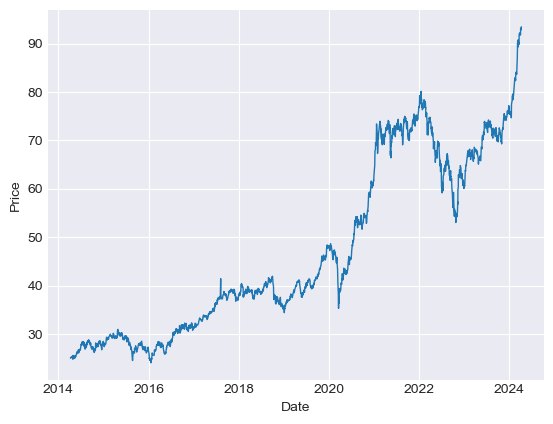

In [5]:
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-darkgrid")
plt.xlabel("Date")
plt.ylabel("Price")
plt.plot(df["RealValue"], linewidth = 1)
plt.show()

# Standarize

In [6]:
from sklearn.preprocessing import MinMaxScaler

# 把數據按比例縮小至0~1範圍
scaler=MinMaxScaler(feature_range = (0, 1))
scaled_prices=scaler.fit_transform(df.values)
scaled_prices

array([[0.01396802],
       [0.01574292],
       [0.01563851],
       ...,
       [0.99567948],
       [0.98991893],
       [1.        ]])

# Construct datasets

In [7]:
import numpy as np
MOVING_WIN_SIZE = 60 #設定天數

all_x, all_y = [], []
for i in range(len(scaled_prices)-MOVING_WIN_SIZE):
    x=scaled_prices[i:i+MOVING_WIN_SIZE]
    y=scaled_prices[i+MOVING_WIN_SIZE]
    all_x.append(x)
    all_y.append(y)

all_x, all_y = np.array(all_x), np.array(all_y) # data type: python list => numpy array

In [8]:
all_x.shape

(2379, 60, 1)

In [9]:
all_y.shape

(2379, 1)

# Split dataset

In [10]:
DS_SPLIT =0.8
train_ds_size = round(all_x.shape[0] * DS_SPLIT)
train_x, train_y=all_x[:train_ds_size], all_y[:train_ds_size]
test_x, test_y=all_x[train_ds_size:], all_y[train_ds_size:]

In [11]:
train_x.shape

(1903, 60, 1)

In [12]:
train_y.shape

(1903, 1)

In [13]:
test_x.shape

(476, 60, 1)

In [14]:
test_y.shape

(476, 1)

# Construct model

In [15]:
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(LSTM(
    units=50,
    return_sequences=True,
    input_shape=(train_x.shape[1],1
)))

model.add(LSTM(
    units=50,
    return_sequences=False
))

model.add(Dense(
    units=25
))

model.add(Dense(
    units=1
))

model.summary()

d:\Program\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer="adam", loss="mean_squared_error")

# Train Model

In [22]:
from tensorflow.keras.callbacks import EarlyStopping

callback=EarlyStopping(monitor = "val_loss", patience=10, restore_best_weights = True)
model.fit(
    train_x,
    train_y,
    validation_split=0.2,
    callbacks=[callback],
    epochs=1000
)

Epoch 1/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.5640e-05 - val_loss: 1.5419e-04
Epoch 2/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.3527e-05 - val_loss: 1.8361e-04
Epoch 3/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.8612e-05 - val_loss: 8.6503e-04
Epoch 4/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 4.7949e-05 - val_loss: 1.2387e-04
Epoch 5/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 3.9037e-05 - val_loss: 1.9417e-04
Epoch 6/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 3.2171e-05 - val_loss: 5.1935e-04
Epoch 7/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 3.7336e-05 - val_loss: 2.2650e-04
Epoch 8/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 3.5560e-05 - val_loss: 3.5407e-04
Epoch 9/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.3859e-05 - val_loss: 2.8097e-04
Epoch 10/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.0804e-05 - val_loss: 1.9882e-04
Epoch 11/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/

# Evaluate Model

In [23]:
predicts = model.predict(test_x)
predicts

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


array([[0.6838932 ],
       [0.67709136],
       [0.6535314 ],
       [0.65379876],
       [0.6313117 ],
       [0.6397237 ],
       [0.65760005],
       [0.64633083],
       [0.64733964],
       [0.6591377 ],
       [0.637451  ],
       [0.61671305],
       [0.61516994],
       [0.61773026],
       [0.59341574],
       [0.6041757 ],
       [0.6111137 ],
       [0.62269   ],
       [0.6344412 ],
       [0.6142681 ],
       [0.62381476],
       [0.6272498 ],
       [0.61343753],
       [0.6206659 ],
       [0.60902804],
       [0.6324529 ],
       [0.6590516 ],
       [0.66619956],
       [0.66161233],
       [0.6487451 ],
       [0.6560772 ],
       [0.643913  ],
       [0.65716386],
       [0.6543143 ],
       [0.6444468 ],
       [0.61364686],
       [0.61289555],
       [0.60890776],
       [0.6071987 ],
       [0.5959305 ],
       [0.58406353],
       [0.60350186],
       [0.5835456 ],
       [0.5670276 ],
       [0.57055026],
       [0.5948153 ],
       [0.5888386 ],
       [0.576

In [24]:
predicts=scaler.inverse_transform(predicts)
predicts

array([[71.55057 ],
       [71.07827 ],
       [69.44234 ],
       [69.4609  ],
       [67.899475],
       [68.483574],
       [69.72485 ],
       [68.94235 ],
       [69.012405],
       [69.83163 ],
       [68.32577 ],
       [66.88579 ],
       [66.77864 ],
       [66.95642 ],
       [65.2681  ],
       [66.015236],
       [66.496994],
       [67.30081 ],
       [68.116776],
       [66.71603 ],
       [67.378914],
       [67.617424],
       [66.65835 ],
       [67.16026 ],
       [66.352165],
       [67.978714],
       [69.825645],
       [70.321976],
       [70.00345 ],
       [69.10999 ],
       [69.61911 ],
       [68.77447 ],
       [69.694565],
       [69.496704],
       [68.81153 ],
       [66.67288 ],
       [66.62071 ],
       [66.34382 ],
       [66.22514 ],
       [65.44272 ],
       [64.61871 ],
       [65.968445],
       [64.58275 ],
       [63.435795],
       [63.680397],
       [65.36528 ],
       [64.95028 ],
       [64.09123 ],
       [62.446842],
       [60.1084  ],


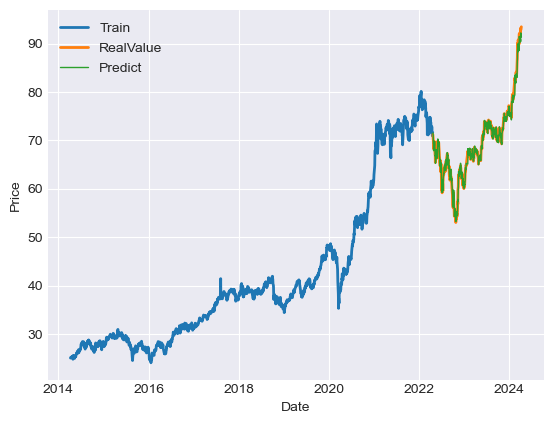

In [25]:
train_df=df[:train_ds_size + MOVING_WIN_SIZE]
test_df=df[train_ds_size+MOVING_WIN_SIZE:]
test_df=test_df.assign(Predict=predicts)

plt.xlabel("Date")
plt.ylabel("Price")
plt.plot(train_df["RealValue"], linewidth=2)
plt.plot(test_df["RealValue"], linewidth=2)
plt.plot(test_df["Predict"], linewidth=1)
plt.legend(("Train", "RealValue", "Predict"))
plt.show()

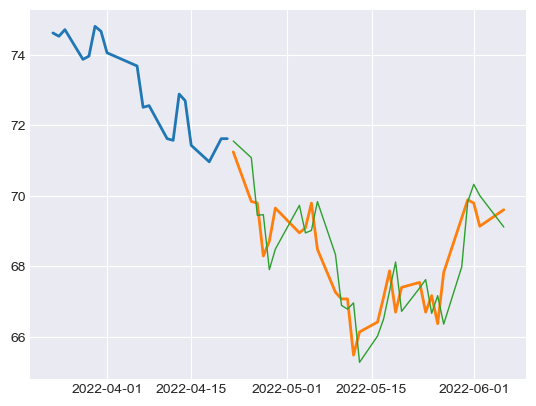

In [26]:
plt.plot(train_df["RealValue"][-20:], linewidth=2)
plt.plot(test_df["RealValue"][:30], linewidth=2)
plt.plot(test_df["Predict"][:30], linewidth=1)
plt.show()

In [27]:
test_df=test_df.assign(Shifted=test_df["RealValue"].shift(1))
test_df.iat[0, -1]=train_df.iat[-1, -1]
test_df

,RealValue,Predict,Shifted
Date,,,
2022-04-22 00:00:00+08:00,71.242912,71.550568,71.618126
2022-04-25 00:00:00+08:00,69.835884,71.078270,71.242912
2022-04-26 00:00:00+08:00,69.788986,69.442337,69.835884
2022-04-27 00:00:00+08:00,68.288139,69.460899,69.788986
2022-04-28 00:00:00+08:00,68.710243,67.899475,68.288139
...,...,...,...
2024-03-29 00:00:00+08:00,92.150002,90.339706,91.800003
2024-04-01 00:00:00+08:00,91.849998,90.883713,92.150002
2024-04-02 00:00:00+08:00,93.199997,90.434135,91.849998


In [28]:
from sklearn.metrics import mean_squared_error

predict_rmse = mean_squared_error(test_df["RealValue"], test_df["Predict"], squared = False)
predict_cvrmse = predict_rmse / test_df["RealValue"].mean() * 100
predict_cvrmse

1.1788365096334297

In [29]:
shifted_rmse = mean_squared_error(test_df["RealValue"], test_df["Shifted"], squared = False)
shifted_cvrmse = shifted_rmse / test_df["RealValue"].mean() * 100
shifted_cvrmse

1.0702814845127462